In [ ]:
import numpy as np
import pandas as pd
from numpy import math
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/RESTAURENT_REVIEW_A_TSV.tsv",delimiter='\t',quoting=3)

In [ ]:
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [ ]:
df.shape

(1000, 2)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [ ]:
df.describe(include='object').T

,count,unique,top,freq
Review,1000,996,I would not recommend this place.,2


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Liked,1000.0,0.5,0.50025,0.0,0.0,0.5,1.0,1.0


<Axes: >

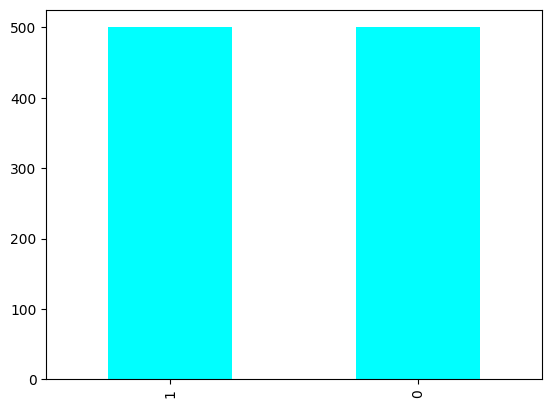

In [ ]:
df['Liked'].value_counts().plot.bar(color = 'cyan')

In [ ]:
# cleaning the texts

import re
import nltk

# downloading the list of stopword
nltk.download('stopwords')
from nltk.corpus import stopwords

from nltk.stem.porter import PorterStemmer

corpus = []

for i in range(0, 1000):

  # getting rid of unwanted characters
  review = re.sub('[^a-zA-Z]', ' ', df['Review'][i])

  #converting all the letters of the review into lowercase
  review = review.lower()

  # splitting every words from the sentences
  review = review.split()

  # applying stemming
  ps = PorterStemmer()

  # iterating through each words and checking if they are stopwords or not
  # if they are stopwords we will not consider them furthermore
  review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]

  # joining the review again
  review = ' '.join(review)

  corpus.append(review)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
# looking at the cleaned text

print(corpus)


['wow love place', 'crust good', 'tasti textur nasti', 'stop late may bank holiday rick steve recommend love', 'select menu great price', 'get angri want damn pho', 'honeslti tast fresh', 'potato like rubber could tell made ahead time kept warmer', 'fri great', 'great touch', 'servic prompt', 'would go back', 'cashier care ever say still end wayyy overpr', 'tri cape cod ravoli chicken cranberri mmmm', 'disgust pretti sure human hair', 'shock sign indic cash', 'highli recommend', 'waitress littl slow servic', 'place worth time let alon vega', 'like', 'burritto blah', 'food amaz', 'servic also cute', 'could care less interior beauti', 'perform', 'right red velvet cake ohhh stuff good', 'never brought salad ask', 'hole wall great mexican street taco friendli staff', 'took hour get food tabl restaur food luke warm sever run around like total overwhelm', 'worst salmon sashimi', 'also combo like burger fri beer decent deal', 'like final blow', 'found place accid could happier', 'seem like go

In [ ]:
# creating the bag of words model

from sklearn.feature_extraction.text import CountVectorizer

# creating the count vectorizer model
cv = CountVectorizer()

# feeding the corpus data to the count vectorizer model
x = cv.fit_transform(corpus).toarray()

In [ ]:
print(x.shape)

(1000, 1565)


In [ ]:
# reducing the number of features

# creating the count vectorizer model with max_features
cv = CountVectorizer(max_features = 1200)

# feeding the corpus data to the count vectorizer model
x = cv.fit_transform(corpus).toarray()

# checking the shape
print(x.shape)

# maing the dependent variable column
y = df.iloc[:, 1].values
print(y.shape)

(1000, 1200)
(1000,)


In [ ]:
# splitting the dataset into training and testing sets

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(750, 1200)
(750,)
(250, 1200)
(250,)


In [ ]:
# min max scaling

from sklearn.preprocessing import MinMaxScaler

# creating a min max scaler
mm = MinMaxScaler()

# feeding the independent variables into the model
x_train = mm.fit_transform(x_train)
x_test = mm.transform(x_test)

In [ ]:
# Naive Bayes Theorem

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix

# creating the model
model = GaussianNB()

# fitting the training data to the model
model.fit(x_train, y_train)

# predicting the test set results
y_pred = model.predict(x_test)

# checking the accuracies
print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

# making the confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

Training Accuracy : 0.8893333333333333
Testing Accuracy : 0.712
[[ 67  50]
 [ 22 111]]


In [ ]:
# applying random forest

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

# creating the model
model = RandomForestClassifier()

# fitting the training data to the model
model.fit(x_train, y_train)

# predicting the test set results
y_pred = model.predict(x_test)

# checking the accuracies
print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

# making the confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

Training Accuracy : 0.9933333333333333
Testing Accuracy : 0.704
[[91 26]
 [48 85]]


In [ ]:
# applying decision trees

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

# creating the model
model = DecisionTreeClassifier()

# fitting the training data to the model
model.fit(x_train, y_train)

# predicting the test set results
y_pred = model.predict(x_test)

# checking the accuracies
print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

# making the confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

Training Accuracy : 0.9933333333333333
Testing Accuracy : 0.624
[[68 49]
 [45 88]]


In [ ]:
# applying logistic regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

# creating the model
model = LogisticRegression()

# fitting the training data to the model
model.fit(x_train, y_train)

# predicting the test set results
y_pred = model.predict(x_test)

# checking the accuracies
print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

# making the confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

Training Accuracy : 0.9506666666666667
Testing Accuracy : 0.7
[[91 26]
 [49 84]]


In [ ]:
# applying svm

from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

# creating the model
model = SVC()

# fitting the training data to the model
model.fit(x_train, y_train)

# predicting the test set results
y_pred = model.predict(x_test)

# checking the accuracies
print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

# making the confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

Training Accuracy : 0.9586666666666667
Testing Accuracy : 0.696
[[100  17]
 [ 59  74]]


In [ ]:
# applying MLP

from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix

# creating the model
model = MLPClassifier()

# fitting the training data to the model
model.fit(x_train, y_train)

# predicting the test set results
y_pred = model.predict(x_test)

# checking the accuracies
print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

# making the confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

Training Accuracy : 0.9893333333333333
Testing Accuracy : 0.7
[[82 35]
 [40 93]]
